# 비선형 모델

#### 모듈 불러오기

In [ ]:
# PyTorch - 모델, 데이터로더 옵티마이저 등
import torch
from torch import nn, optim
from torch.utils.data import DataLoader, TensorDataset
import torchvision

# 시각화 및 기타 툴
import itertools
from tqdm import tqdm
import time
import matplotlib.pyplot as plt
import numpy as np

#### 파라미터 설정

In [ ]:
batch_size = 64
input_size = 64
num_classes = 10
learning_rate = 0.01
epochs = 50

#### 데이터셋 로드

In [ ]:
# sklearn에서 제공하는 digits 데이터셋 사용
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# digits 데이터 로드 및 전처리
digits = load_digits()
X = digits.data
y = digits.target

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train_dataset = TensorDataset(torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train))
test_dataset = TensorDataset(torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test))

In [ ]:
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

#### 데이터 확인

In [ ]:
# 학습데이터에서 랜덤 이미지 불러오기
dataiter = iter(train_loader)
# images, labels = dataiter.next()
images, labels = next(dataiter)
print(images.shape)

torch.Size([64, 64])


In [ ]:
print(images[0])

tensor([ 0.0000, -0.3350,  0.5880,  0.5095,  0.9687,  1.8038,  0.1918, -0.1250,
        -0.0591, -0.6240,  0.1140, -1.5037, -0.6859,  1.2930, -0.2361, -0.1304,
        -0.0446, -0.7276, -1.7407, -1.2054,  0.4700,  0.6769, -0.5488, -0.1142,
        -0.0334, -0.4672,  0.3083,  1.2206,  0.9874,  1.4390,  2.6272, -0.0472,
         0.0000, -0.0976,  0.6852,  0.6268,  0.4549, -1.1491, -0.8227,  0.0000,
        -0.0613, -0.5313, -0.8998,  1.0516, -0.5868, -1.4465, -0.7983, -0.0887,
        -0.0354, -0.4036,  0.0874,  0.4709, -1.7765, -1.4526, -0.7574, -0.2098,
        -0.0236, -0.2991,  1.2628, -1.1636, -2.3941, -1.1466, -0.5057, -0.1960])


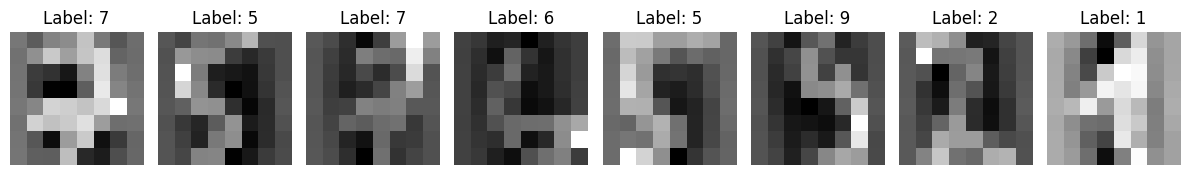

tensor([7, 5, 7, 6, 5, 9, 2, 1])


In [ ]:
# 이미지 출력 함수 정의 (참고, 보통의 경우 다른 방법을 사용합니다.)
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# 랜덤 이미지 불러오기
dataiter = iter(train_loader)
# images, labels = dataiter.next()
images, labels = next(dataiter)

# 이미지 출력
plt.figure(figsize=(12, 2))
for i in range(8):
    ax = plt.subplot(1, 8, i + 1)
    img = images[i].reshape(8, 8).numpy()
    ax.imshow(img, cmap='gray')
    ax.set_title(f'Label: {labels[i].item()}')
    ax.axis('off')
plt.tight_layout()
plt.show()
# 레이블 출력
print(labels[:8])

#### 모델 정의

Single Layer Perceptron

In [ ]:
model = nn.Sequential(
    nn.Linear(input_size, num_classes),
    nn.ReLU()
)

#### 손실함수 및 옵티마이저

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

#### 모델 학습

In [ ]:
total_step = len(train_loader)
loss_values = [] # loss 그래프 생성을 위한 loss 저장 list

for epoch in range(epochs):
    for i, (images, labels) in enumerate(train_loader):

        # Forward pass (예측)
        outputs = model(images)
        # outputs = torch.sigmoid(outputs)

        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad() # 옵티마이저 초기화(이전 학습의 영향 제거)
        loss.backward()
        optimizer.step()

        loss_values.append(loss.item()) # list에 현재 loss 추가

        if (i+1) % 12 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                   .format(epoch+1, epochs, i+1, total_step, loss.item()))


Epoch [1/50], Step [12/23], Loss: 2.2246
Epoch [2/50], Step [12/23], Loss: 1.9586
Epoch [3/50], Step [12/23], Loss: 1.8040
Epoch [4/50], Step [12/23], Loss: 1.5377
Epoch [5/50], Step [12/23], Loss: 1.2552
Epoch [6/50], Step [12/23], Loss: 1.1659
Epoch [7/50], Step [12/23], Loss: 1.1279
Epoch [8/50], Step [12/23], Loss: 1.0772
Epoch [9/50], Step [12/23], Loss: 0.9210
Epoch [10/50], Step [12/23], Loss: 0.8653
Epoch [11/50], Step [12/23], Loss: 0.8488
Epoch [12/50], Step [12/23], Loss: 0.7404
Epoch [13/50], Step [12/23], Loss: 0.6480
Epoch [14/50], Step [12/23], Loss: 0.6245
Epoch [15/50], Step [12/23], Loss: 0.6864
Epoch [16/50], Step [12/23], Loss: 0.5263
Epoch [17/50], Step [12/23], Loss: 0.5539
Epoch [18/50], Step [12/23], Loss: 0.5788
Epoch [19/50], Step [12/23], Loss: 0.4756
Epoch [20/50], Step [12/23], Loss: 0.4445
Epoch [21/50], Step [12/23], Loss: 0.5642
Epoch [22/50], Step [12/23], Loss: 0.4857
Epoch [23/50], Step [12/23], Loss: 0.5050
Epoch [24/50], Step [12/23], Loss: 0.5376
E

#### 학습 결과 시각화

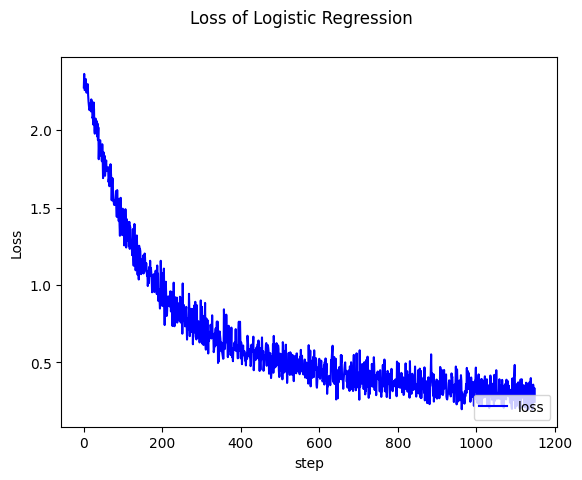

In [ ]:
#학습 그래프 출력
# 그래프가 0에 가깝게 수렴하면 좋은 학습입니다.

fig, loss_ax = plt.subplots()

loss_ax.plot(loss_values, 'b', label='loss',  fillstyle='none')

loss_ax.set_xlabel('step')
loss_ax.set_ylabel('Loss')
fig.suptitle('Loss of Logistic Regression')

loss_ax.legend(loc='lower right')


plt.show()

#### 성능 평가

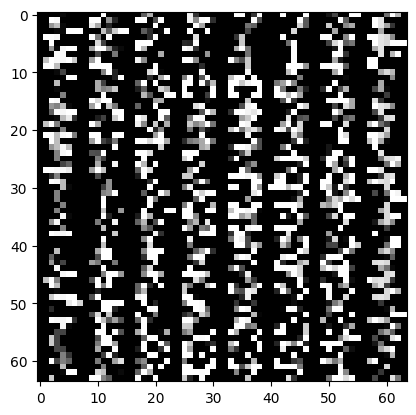

ground truth:  tensor([6, 9, 3, 7, 2, 1, 5, 2, 5, 2, 1, 9, 4, 0, 4, 2, 3, 7, 8, 8, 4, 3, 9, 7,
        5, 6, 3, 5, 6, 3, 4, 9, 1, 4, 4, 6, 9, 4, 7, 6, 6, 9, 1, 3, 6, 1, 3, 0,
        6, 5, 5, 1, 9, 5, 6, 0, 9, 0, 0, 1, 0, 4, 5, 2])
predicted:  tensor([6, 9, 3, 7, 2, 2, 5, 2, 5, 2, 1, 9, 4, 0, 4, 2, 3, 7, 8, 8, 4, 3, 9, 7,
        5, 6, 3, 5, 6, 3, 4, 9, 1, 4, 4, 6, 9, 4, 7, 6, 6, 9, 1, 3, 6, 1, 3, 0,
        6, 5, 5, 1, 9, 5, 6, 0, 9, 0, 0, 1, 0, 4, 5, 2])


In [ ]:
with torch.no_grad():
    # get some random training images
    dataiter = iter(test_loader)
    # images, labels = dataiter.next()
    images, labels = next(dataiter)

    # show images
    imshow(torchvision.utils.make_grid(images))

    images = images.reshape(-1, input_size)
    outputs = model(images)

    _, predicted = torch.max(outputs.data, 1)




    # print labels
    print("ground truth: ", labels)
    print("predicted: ", predicted)

In [ ]:
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, input_size)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum()

    print('Accuracy : {} %'.format(100 * correct.item() / total))

Accuracy : 92.77777777777777 %


# 모델 선택(Model Selection)

### 파라미터 설정

고정 파라미터와 비교 파라미터를 자유롭게 설정하세요.

(input_size와 num_classes는 항상 고정)

작성된 코드는 예시입니다.

In [ ]:
# 고정
input_size = 64
num_classes = 10

batch_size = 64

비교할 파라미터는 리스트로 비교하고 싶은 값을 설정하세요.

In [ ]:
# 비교
hidden_sizes = [None, 128]
learning_rates = [0.001, 0.01]
epoch_list = [5, 10]

위에서 실험한 퍼셉트론에 은닉층(Hidden layer)을 추가하여 모델의 깊이에 따른 성능도 비교합니다.

In [ ]:
hidden_sizes = [None, 128]

### 모델 셀렉션을 위한 학습


***하이퍼파라미터를 바꾸어가며 최적의 조합을 찾아보세요***

In [ ]:
results = []
loss_traces = {}

In [ ]:
for hidden_size, lr, num_epochs in itertools.product(hidden_sizes, learning_rates, epoch_list):
    print(f"Hidden={hidden_size}, LR={lr}, Epochs={num_epochs}")
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    if hidden_size is None:
        model = nn.Sequential(
            nn.Linear(input_size, num_classes),
            nn.ReLU()
        )
        model_type = 'SLP (1-layer)'
    else:
        model = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, num_classes)
        )
        model_type = f"MLP({hidden_size})"

    optimizer = optim.Adam(model.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()

    train_losses = []

    # 학습
    start = time.time()
    for epoch in range(num_epochs):
        epoch_loss = 0
        loop = tqdm(train_loader, leave=False)
        for images, labels in loop:
            outputs = model(images)
            loss = criterion(outputs, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        avg_loss = epoch_loss / len(train_loader)
        train_losses.append(avg_loss)
    elapsed = time.time() - start

    # 평가
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, preds = torch.max(outputs.data, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
    acc = 100 * correct / total
    results.append((model_type, hidden_size, lr, num_epochs, acc, elapsed))
    key = f"{model_type} | LR={lr}, Epochs={num_epochs}"
    loss_traces[key] = train_losses
    print(f"[{key}] Accuracy: {acc:.2f}%, Time: {elapsed:.2f}s")

Hidden=None, LR=0.001, Epochs=5


[SLP (1-layer) | LR=0.001, Epochs=5] Accuracy: 86.94%, Time: 0.17s
Hidden=None, LR=0.001, Epochs=10


[SLP (1-layer) | LR=0.001, Epochs=10] Accuracy: 90.00%, Time: 0.33s
Hidden=None, LR=0.01, Epochs=5


[SLP (1-layer) | LR=0.01, Epochs=5] Accuracy: 94.72%, Time: 0.18s
Hidden=None, LR=0.01, Epochs=10


[SLP (1-layer) | LR=0.01, Epochs=10] Accuracy: 95.83%, Time: 0.33s
Hidden=128, LR=0.001, Epochs=5


[MLP(128) | LR=0.001, Epochs=5] Accuracy: 94.17%, Time: 0.20s
Hidden=128, LR=0.001, Epochs=10


[MLP(128) | LR=0.001, Epochs=10] Accuracy: 96.39%, Time: 0.40s
Hidden=128, LR=0.01, Epochs=5


[MLP(128) | LR=0.01, Epochs=5] Accuracy: 97.78%, Time: 0.20s
Hidden=128, LR=0.01, Epochs=10


[MLP(128) | LR=0.01, Epochs=10] Accuracy: 97.78%, Time: 0.41s


In [ ]:
# 결과 테이블 출력
import pandas as pd

df = pd.DataFrame(results, columns=["Model", "Hidden Size", "LR", "Epochs", "Accuracy", "Time(s)"])
display(df.sort_values(by="Accuracy", ascending=False))


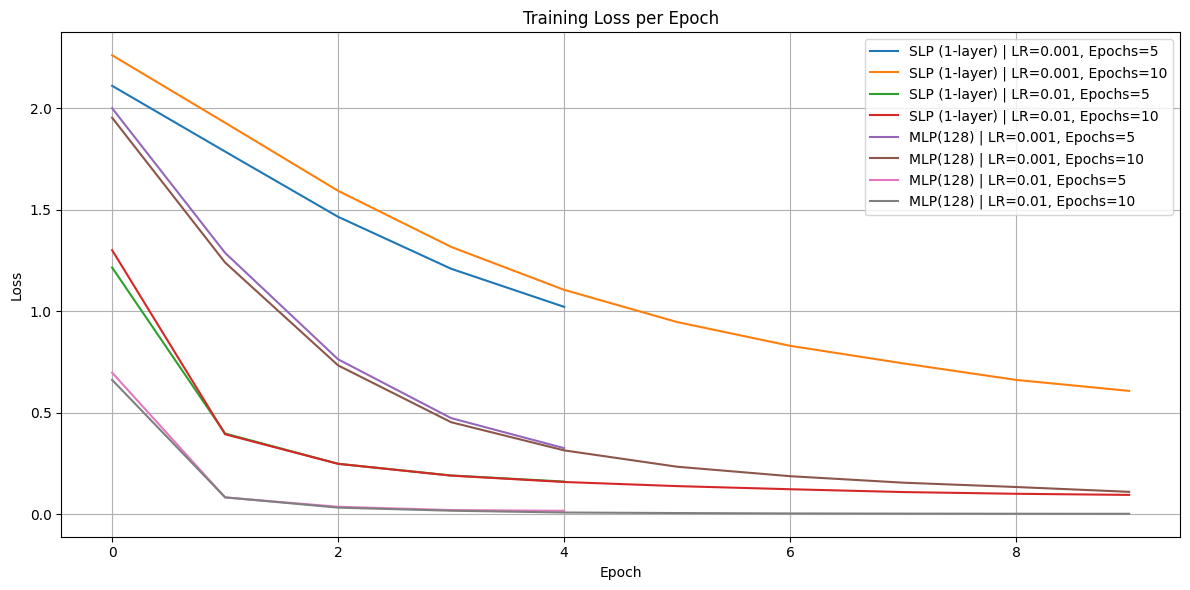

In [ ]:
# loss 그래프 비교

plt.figure(figsize=(12, 6))
for label, losses in loss_traces.items():
    plt.plot(losses, label=label)
plt.title("Training Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
